# Tarea 4. Construyendo la frontera de mínima varianza para dos activos.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="600px" height="400px" />

**Resumen.**
> En esta tarea, construirás la frontera de mínima varianza para dos activos riesgosos usando los datos de mercados internacionales que usamos en la clase 10.

> Construirás portafolios que consisten de dos activos riesgosos, graficarás la frontera de mínima varianza y encontrarás el portafolio de mínima varianza. Repetirás luego el ejercicio para otro par de activos y compararás los beneficios de diversificación en cada caso.

> Por favor, revisar la clase 10 para los datos. 

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea5_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea5_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Copiar y pegar los datos de rendimientos esperados, volatilidades y correlaciones de mercados internacionales brindados en la Clase 9.

1. Mostrar los DataFrame con los datos (5 puntos).
2. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (5 puntos).

In [2]:
import pandas as pd
import numpy as np

In [3]:
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [4]:
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


In [5]:
from matplotlib import pyplot as plt

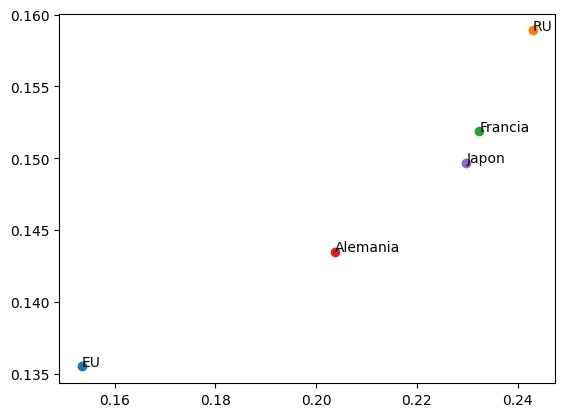

In [6]:
paises = annual_ret_summ.keys()
for i in paises:
    plt.scatter(annual_ret_summ[i].loc['Volatilidad'], annual_ret_summ[i].loc['Media'])
    plt.text(annual_ret_summ[i].loc['Volatilidad'], annual_ret_summ[i].loc['Media'], i)
    

## 2. Portafolios con Japón y Reino Unido (30 puntos)

Usando los datos del punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los mercados Japoneses y del Reino Unido como activos riesgosos. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [7]:
# Vector de w entre 0 y 1 con N pasos
N = 101
w = np.linspace(0, 1, N)
# Activo1: RU, Activo2: Japon, 
# Rendimientos esperados individuales
e_ru = annual_ret_summ['RU'].loc['Media']
e_jp = annual_ret_summ['Japon'].loc['Media']

# Volatilidades individuales
vol_ru = annual_ret_summ['RU'].loc['Volatilidad']
vol_jp = annual_ret_summ['Japon'].loc['Volatilidad']

# Correlacion
corr_ru_jp = corr['RU']['Japon']

# Covarianza
covariance_ru_jp = corr_ru_jp * vol_jp * vol_ru

In [10]:
e_ru

0.1589

In [11]:
corr_ru_jp

0.3581

In [8]:
portafolio1 = pd.DataFrame({
    'w_us':  w,
    'w_jp':  1 - w, 
    'media':  w*e_ru + (1-w) * e_jp,
    'vol':  np.sqrt(w**2 * vol_ru**2 + (1-w)**2 * vol_jp**2 +  covariance_ru_jp*w*(1-w))

})
portafolio1

,w_us,w_jp,media,vol
0,0.00,1.00,0.149700,0.229800
1,0.01,0.99,0.149792,0.227950
2,0.02,0.98,0.149884,0.226125
3,0.03,0.97,0.149976,0.224326
4,0.04,0.96,0.150068,0.222554
...,...,...,...,...
96,0.96,0.04,0.158532,0.235100
97,0.97,0.03,0.158624,0.237041
98,0.98,0.02,0.158716,0.239006
99,0.99,0.01,0.158808,0.240992


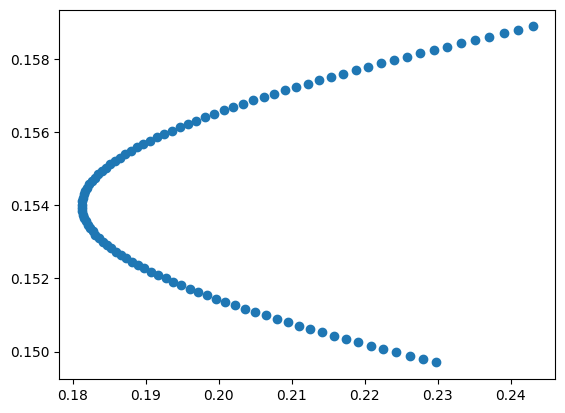

In [9]:
plt.scatter(portafolio1.vol, portafolio1.media)

In [35]:
# Portafolio de minima varianza Vol/Ren y pesos
min_variance = portafolio1[portafolio1.vol == portafolio1.vol.min()]
min_variance

,w_us,w_jp,media,vol
47,0.47,0.53,0.154024,0.18127


## 3. Mismos activos, distinta correlación (30 puntos)

En este punto se usarán los mismos activos (Japón y Reino Unido) con sus rendimientos esperados y volatilidades, solo que supondremos que el coeficiente de correlación entre sus rendimiento es de 0.5.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos con el nuevo supuesto de correlación. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [36]:
# Vector de w entre 0 y 1 con N pasos
N = 101
w = np.linspace(0, 1, N)
# Activo1: RU, Activo2: Japon, 
# Rendimientos esperados individuales
e_ru = annual_ret_summ['RU'].loc['Media']
e_jp = annual_ret_summ['Japon'].loc['Media']

# Volatilidades individuales
vol_ru = annual_ret_summ['RU'].loc['Volatilidad']
vol_jp = annual_ret_summ['Japon'].loc['Volatilidad']

# Correlacion
corr_ru_jp2 = 0.5

# Covarianza
covariance_ru_jp = corr_ru_jp2 * vol_jp * vol_ru

In [39]:
portafolio2 = pd.DataFrame({
    'w_us':  w,
    'w_jp':  1 - w, 
    'media':  w*e_ru + (1-w) * e_jp,
    'vol':  np.sqrt(w**2 * vol_ru**2 + (1-w)**2 * vol_jp**2 +  covariance_ru_jp*w*(1-w))

})
portafolio2

,w_us,w_jp,media,vol
0,0.00,1.00,0.149700,0.229800
1,0.01,0.99,0.149792,0.228122
2,0.02,0.98,0.149884,0.226468
3,0.03,0.97,0.149976,0.224839
4,0.04,0.96,0.150068,0.223236
...,...,...,...,...
96,0.96,0.04,0.158532,0.235746
97,0.97,0.03,0.158624,0.237527
98,0.98,0.02,0.158716,0.239330
99,0.99,0.01,0.158808,0.241155


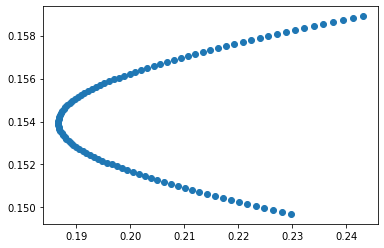

In [40]:
plt.scatter(portafolio2.vol, portafolio2.media)

In [41]:
min_variance_p2 = portafolio2[portafolio2.vol == portafolio2.vol.min()]
min_variance_p2

,w_us,w_jp,media,vol
46,0.46,0.54,0.153932,0.186626


## 4. Gráficos y conclusiones (30 puntos)

1. Usando sus respuestas para los puntos 2 y 3, grafique las dos fronteras encontradas en una sola gráfica, además de los puntos correspondientes a los activos individuales, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, ¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?, ¿cómo puede explicar esta diferencia? (15 puntos).

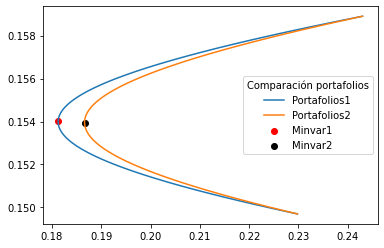

In [65]:
plt.plot(portafolio1.vol, portafolio1.media, label="Portafolios1")
plt.plot(portafolio2.vol, portafolio2.media, label="Portafolios2")
plt.scatter(min_variance.vol, min_variance.media, label="Minvar1", c='r')
plt.scatter(min_variance_p2.vol, min_variance_p2.media, label="Minvar2", c='black')

plt.legend(title="Comparación portafolios")

## 5. Frontera y portafolio de mínima varianza con los 5 índices de mercado (Bonus, 20 puntos del examen)

Usando los datos del punto 1:

1. Construya la frontera de mínima varianza para los portafolios que se pueden crear con todos los índices de mercado. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame.
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza?.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>